# **ABOUT HEART ATTACK**

> A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

> This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Data Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: chest pain type
    Value 0: asymptomatic
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: typical angina
- trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
- chol: The person’s cholesterol measurement in mg/dl
- fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: resting electrocardiographic results
    Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    Value 1: normal
    Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- thalach: The person’s maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping;
- ca: The number of major vessels (0–3)
- thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    Value 1: fixed defect (no blood flow in some part of the heart)
    Value 2: normal blood flow
    Value 3: reversible defect (a blood flow is observed but it is not normal)
- target: Heart disease (1 = no, 0= yes)

## Task1: Import Python Libraries

In [146]:
#!pip install matplotlib
#!pip install --upgrade matplotlib --user

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix   
from sklearn.metrics import log_loss, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, plot_roc_curve

## Task2: Explore and Clean the Data

In [38]:
df = pd.read_csv('Heart_Attack_Data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
# columns of the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
#Rename the class variable num to target
#df = df.rename(columns={'class': 'target'})
#df.head()

In [42]:
# Print out the classes and their counts
df['target'].value_counts(dropna=False)

1    526
0    499
Name: target, dtype: int64

###### Insight: Dataset is perfectly balanced among classes of 0 and 1, so we’ll proceed without special adjustment.

In [43]:
# Summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


###### Insights: 
- There are 303 observations in the dataset and 13 other features besides target.
- There are null values in the variables and we may need to drop certain variables.
- All numeric variables.

In [14]:
# Remove the rows with missing values
#df = df.dropna().copy()
#print(df.shape)
#df.head()

In [15]:
# transform data to numeric to enable further analysis
#df = df.apply(pd.to_numeric)
#df.dtypes

In [16]:
# Recheck the summary to make sure the dataset is cleaned
#df.info()

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


###### Insight: 'Chol' and 'oldpeak' may have outliers.

In [47]:
# using mean + 3 standard deviation cut off 
df[df['chol'] > 400]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
641,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
685,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [48]:
# using mean + 3 standard deviation cut off 
df[df['oldpeak'] > 4.4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


###### Insight: Not doing any outlier treatments as things seem normal

## Task3: Data Visualization

<Axes: xlabel='target', ylabel='count'>

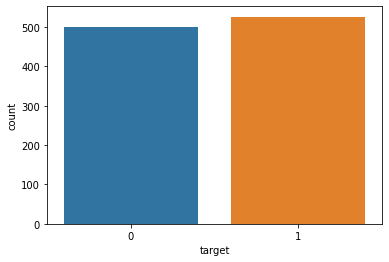

In [45]:
sns.countplot(data =df,x = df['target'], label = 'count')

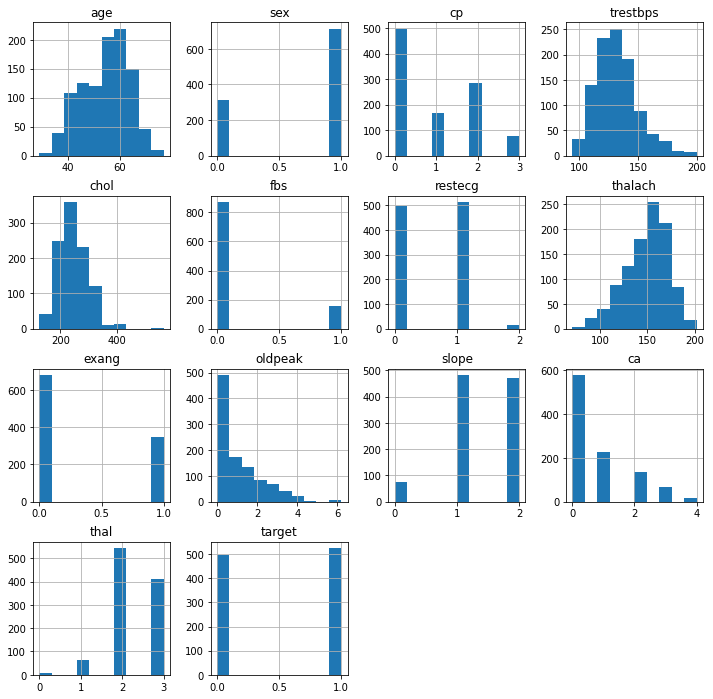

In [49]:
# plot histograms for each variable
df.hist(figsize = (12, 12))
plt.show()

###### Insights:
- sex, exang and fbs in 0/1 format- No transformation required
- age, trestbps, thalach, oldpeak, chol are continuous variables and will require scaling
- cp, restecg, slope, ca, thal may require one-hot encoding

In [50]:
# Correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


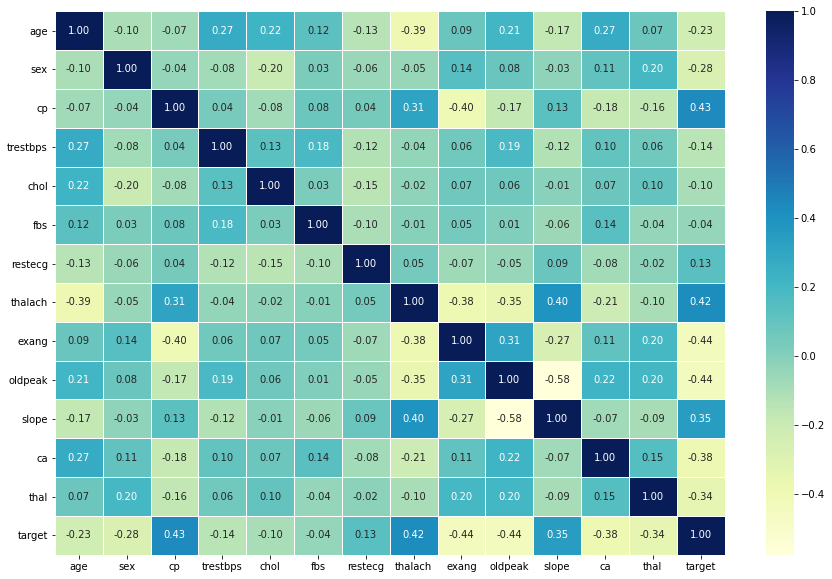

In [51]:
# Correlation heatmap
#sns.heatmap(df.corr(),annot = True)
# Visualizing
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

###### Insights: Not much correlation between variables.

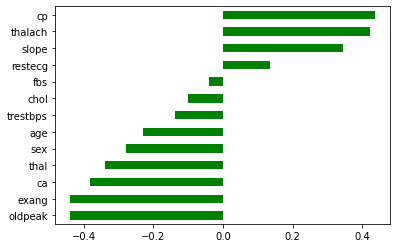

In [52]:
# Correlation of the target column with other columns
df.corr()['target'].sort_values().drop('target').plot(kind = 'barh', color="green");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


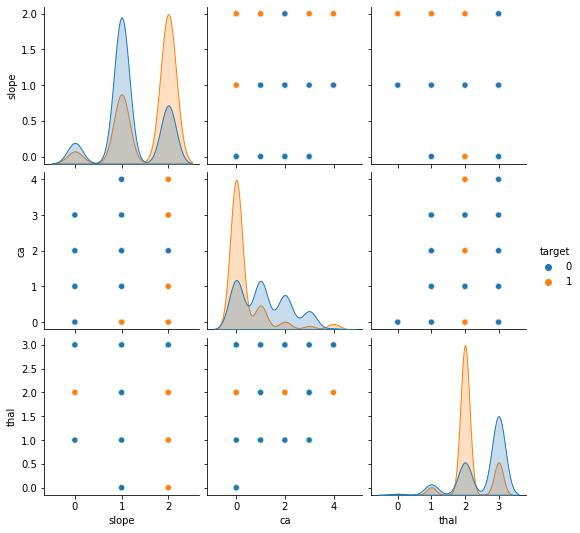

In [53]:
# Pairwise relationships between variables within the dataset (Taking Specific columns)
sns.pairplot(df.iloc[:,10:14], hue = 'target')

In [54]:
# Get the data of people who've had a heart attack only, to analyze them in detail. 
attack_data = df[df.target==1]
attack_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


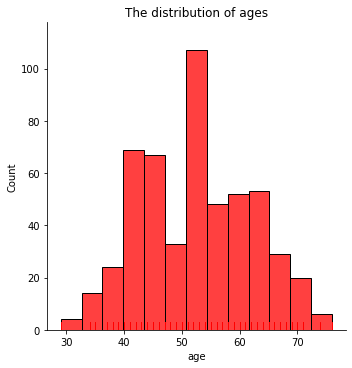

In [55]:
ax= sns.displot(attack_data.age, rug=True, color="red")
plt.title("The distribution of ages")
plt.show()

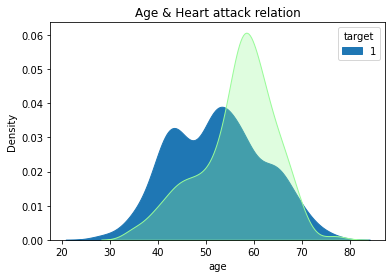

In [56]:
#The relation between age and heart attack#
# Blue represents the people who have had a heart attack and the green one represents the people who haven't had a heart attack#
    
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.title("Age & Heart attack relation")
sns.kdeplot(data=df[df.target==1],x='age',hue = "target", shade=True,ax = ax1 ,color='coral',alpha=1)
sns.kdeplot(data=df[df.target==0],x='age',shade=True,ax = ax1,color='palegreen',alpha=0.3);

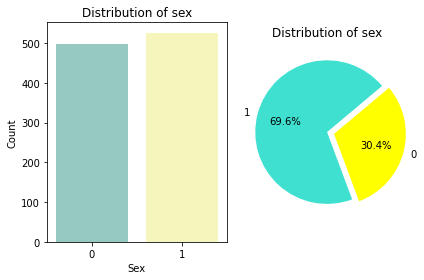

In [57]:
plt.subplot(1,2,1)
ax = sns.countplot(x='target', data=df, palette="Set3")
plt.title('Distribution of sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.pie(df.sex.value_counts(), labels = df.sex.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of sex')
plt.tight_layout()
plt.show()

In [58]:
# Heart Disease Frequency per Chest Pain Type
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


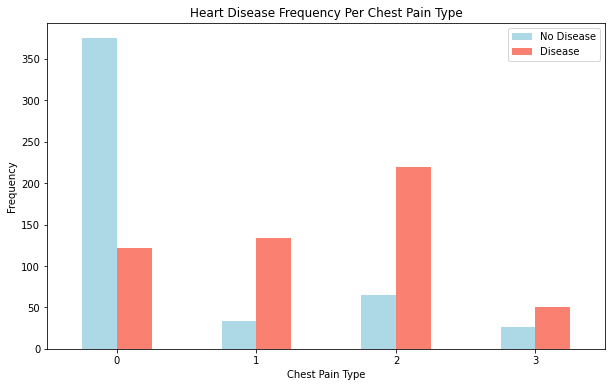

In [59]:
# Visualizing Heart Disease Frequency per Chest Pain Type
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

To learn more about Data Cleaning: https://www.justintodata.com/data-cleaning-techniques-python-guide/

## Task4: Transform the Categorical Variables: Creating Dummy Variables

In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

Among the categorical variables: sex, fbs, and exang only have two levels of 0 and 1, so they are already in the dummy variable format. But we may need to convert cp, slope, thal, ca, restecg into dummy variables.

In [15]:
df['cp'].value_counts(dropna=False)

4    113
2     92
3     46
1     10
Name: cp, dtype: int64

In [16]:
df['restecg'].value_counts(dropna=False)

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

In [60]:
df['slope'].value_counts(dropna=False)

1    482
2    469
0     74
Name: slope, dtype: int64

In [61]:
df['ca'].value_counts(dropna=False)

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [62]:
df['thal'].value_counts(dropna=False)

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

###### Insight: 
1. ca: The number of major vessels (0–3) -> can be considered as a continuous variable and no need to do one-hot encoding
2. Other 4 variables, we will use one-hot encoding.

In [64]:
print(df.shape)

(1025, 14)


In [65]:
# The drop_first parameter is set to True so that the unnecessary first level dummy variable is removed.
df = pd.get_dummies(df, columns=['cp', 'slope', 'thal','restecg'], drop_first=True)

print(df.shape)
df.head()

(1025, 20)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,0,1,0,0,1,1,0
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,0,0,0,1,1,0
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,0,1,0,0,1,1,0
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,1,0,0,1,0,1,0


The variable 'cp' is now represented by three dummy variables cp_2, cp_3, and cp_4. cp_1 was removed since it’s not necessary to distinguish the classes of cp.
Similarly, the variable 'restecg' is now represented by two dummy variables restecg_1.0 and restecg_2.0.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   trestbps   1025 non-null   int64  
 3   chol       1025 non-null   int64  
 4   fbs        1025 non-null   int64  
 5   thalach    1025 non-null   int64  
 6   exang      1025 non-null   int64  
 7   oldpeak    1025 non-null   float64
 8   ca         1025 non-null   int64  
 9   target     1025 non-null   int64  
 10  cp_1       1025 non-null   uint8  
 11  cp_2       1025 non-null   uint8  
 12  cp_3       1025 non-null   uint8  
 13  slope_1    1025 non-null   uint8  
 14  slope_2    1025 non-null   uint8  
 15  thal_1     1025 non-null   uint8  
 16  thal_2     1025 non-null   uint8  
 17  thal_3     1025 non-null   uint8  
 18  restecg_1  1025 non-null   uint8  
 19  restecg_2  1025 non-null   uint8  
dtypes: float

In [68]:
# Print out the numeric columns and categorical columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print(numeric_cols)

cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['ca', 'cp_1', 'cp_2', 'cp_3', 'exang', 'fbs', 'restecg_1', 'restecg_2', 'sex', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3']


## Task5: Split Training and Test Datasets

stratify=df[‘target’]-

when the dataset is imbalanced, it’s good practice to do stratified sampling. In this way, both the training and test datasets will have similar portions of the target classes as the complete dataset.

In [69]:
X = df.drop(columns = ['target'])
y = df['target']

In [71]:
print(X.shape)
print(y.shape)
X.head()

(1025, 19)
(1025,)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,1,0,0,1,1,0
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,0,0,1,1,0
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,1,0,0,1,1,0
4,62,0,138,294,1,106,0,1.9,3,0,0,0,1,0,0,1,0,1,0


In [104]:
#from sklearn.model_selection import train_test_split

#Splitting datasets into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [105]:
X_train.shape, X_test.shape

((820, 19), (205, 19))

In [106]:
y_train.shape, y_test.shape

((820,), (205,))

In [108]:
y_train[:10]

968    0
952    1
490    1
127    1
659    1
849    0
512    0
11     0
812    0
838    1
Name: target, dtype: int64

In [109]:
y_test[:10]

932    1
76     1
353    1
621    0
830    1
215    1
738    0
884    0
980    1
784    1
Name: target, dtype: int64

## Task6: Transform the Numerical Variables: Scaling

In [110]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
968,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,1,0,0
952,54,0,135,304,1,170,0,0.0,0,0,1,0,0,1,0,1,0,1,0
490,57,0,128,303,0,159,0,0.0,1,0,0,0,0,1,0,1,0,0,0
127,53,1,130,197,1,152,0,1.2,0,0,1,0,0,0,0,1,0,0,0
659,59,1,138,271,0,182,0,0.0,0,0,0,0,0,1,0,1,0,0,0


In [111]:
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
968,-0.146426,1,0.477721,-0.822391,1,0.259355,1,1.751970,0,0,0,0,0,0,0,0,1,0,0
952,-0.037864,0,0.191995,1.114766,1,0.897367,0,-0.906365,0,0,1,0,0,1,0,1,0,1,0
490,0.287821,0,-0.208023,1.095586,0,0.429491,0,-0.906365,1,0,0,0,0,1,0,1,0,0,0
127,-0.146426,1,-0.093732,-0.937470,1,0.131752,0,0.122668,0,0,1,0,0,0,0,1,0,0,0
659,0.504944,1,0.363431,0.481833,0,1.407777,0,-0.906365,0,0,0,0,0,1,0,1,0,0,0


In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 968 to 174
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        820 non-null    float64
 1   sex        820 non-null    int64  
 2   trestbps   820 non-null    float64
 3   chol       820 non-null    float64
 4   fbs        820 non-null    int64  
 5   thalach    820 non-null    float64
 6   exang      820 non-null    int64  
 7   oldpeak    820 non-null    float64
 8   ca         820 non-null    int64  
 9   cp_1       820 non-null    uint8  
 10  cp_2       820 non-null    uint8  
 11  cp_3       820 non-null    uint8  
 12  slope_1    820 non-null    uint8  
 13  slope_2    820 non-null    uint8  
 14  thal_1     820 non-null    uint8  
 15  thal_2     820 non-null    uint8  
 16  thal_3     820 non-null    uint8  
 17  restecg_1  820 non-null    uint8  
 18  restecg_2  820 non-null    uint8  
dtypes: float64(5), int64(4), uint8(10)
memory usage:

In [113]:
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])
X_test.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
932,-0.446236,0,0.484651,1.249880,0,-0.383084,0,0.307131,1,0,1,0,0,1,0,1,0,0,0
76,-0.800804,1,-0.427371,0.172961,1,1.204883,0,-0.937174,2,0,1,0,0,1,0,1,0,1,0
353,0.262899,1,-1.225391,-0.924277,0,-1.153007,1,0.307131,0,0,0,0,1,0,1,0,0,1,0
621,-0.800804,1,-0.085363,0.193280,1,0.001878,1,-0.937174,2,0,0,0,0,1,0,0,1,0,0
830,-0.446236,1,-1.795405,-0.497573,0,-0.334964,1,0.058270,0,0,1,0,1,0,0,1,0,1,0


## Task7: Simple Logistic Regression

#### A) Build the Model

In [114]:
# logistic regression with L1 penalty in the cost function.
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')

#### B) Evaluate the Model

###### Checking for Train set first

In [115]:
# Getting the predicted values on the train set
train_pred = lr.predict(X_train)
train_pred[:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [116]:
train_prob = lr.predict_proba(X_train)[:, 1]
print(train_prob[:10])
print("\n")

[0.04574438 0.99023901 0.81065507 0.89007313 0.7783044  0.23489507
 0.6111441  0.04682403 0.17832631 0.60257252]




In [117]:
print('Log loss = {:.5f}'.format(log_loss(y_train, train_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_train, train_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_train, train_prob)))

print('\nUsing 0.5 as threshold:\n')

print('Accuracy = {:.5f}'.format(accuracy_score(y_train, train_pred)))
print('Precision = {:.5f}'.format(precision_score(y_train, train_pred)))
print('Recall = {:.5f}'.format(recall_score(y_train, train_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_train, train_pred)))

print('\nClassification Report')
print(classification_report(y_train, train_pred))

Log loss = 0.32852
AUC = 0.93500
Average Precision = 0.93882

Using 0.5 as threshold:

Accuracy = 0.85610
Precision = 0.83843
Recall = 0.89720
F1 score = 0.86682

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       392
           1       0.84      0.90      0.87       428

    accuracy                           0.86       820
   macro avg       0.86      0.85      0.86       820
weighted avg       0.86      0.86      0.86       820



**ROC curve** (Receiver Operating Characteristic) is a plot that displays the sensitivity and specificity of a logistic regression model.

- The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.
- Calculate the AUC (Area Under the Curve) which tells us how much of the plot is located under the curve.
- The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

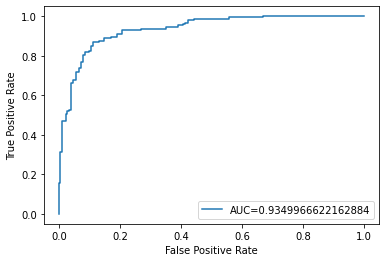

In [118]:
# Plot ROC Curve and show AUC value
from sklearn.metrics import roc_curve, roc_auc_score

# Define metrics
fpr, tpr, _ = roc_curve(y_train, train_prob)
auc = roc_auc_score(y_train, train_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Precision Recall curve** shows the tradeoff between precision and recall for different thresholds.

- The x-axis shows the recall and the y-axis shows the precision for various thresholds.
- As recall increases, precision decreases.
- This represents the tradeoff between the two metrics. To increase the recall of our model, the precision must decrease and vice versa.
- The curve is generally non-linear, implying that increasing one metric decreases the other, but the decrease might not be proportional.
- Precision and recall are key evaluation metrics to measure the performance of machine learning classification models. However, the trade-off between the two depends on the business prerogative and is best resolved through the PR curve.

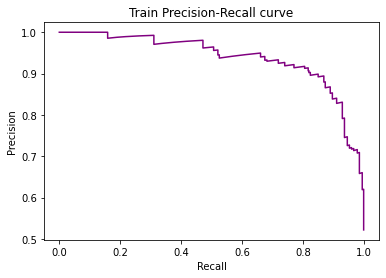

In [119]:
from sklearn.metrics import precision_recall_curve

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train, train_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

plt.show()

###### Insight: At the recall value of 90%, the precision stands at ~80% == Good Precision (60%), High Recall (90%). 

**Note:** 
- ROC curves should be used when there are roughly equal numbers of observations for each class.
- Precision-Recall curves should be used when there is a moderate to large class imbalance.
- The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.

###### Checking for Test set

In [120]:
# Getting the predicted values on the train set
lr_test_pred = lr.predict(X_test)
lr_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [121]:
test_prob = lr.predict_proba(X_test)[:, 1]
print(test_prob[:10])
print("\n")

[0.88570016 0.92158957 0.20651987 0.06945578 0.7902315  0.91809447
 0.17305966 0.05861629 0.5358152  0.66503273]




In [122]:
lr_acc_score = accuracy_score(y_test, lr_test_pred)

print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))

print('\nUsing 0.5 as threshold:')

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, lr_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, lr_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, lr_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, lr_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, lr_test_pred))

Log loss = 0.38114
AUC = 0.91217
Average Precision = 0.88898

Using 0.5 as threshold:
Accuracy = 0.84390
Precision = 0.78448
Recall = 0.92857
F1 score = 0.85047

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       107
           1       0.78      0.93      0.85        98

    accuracy                           0.84       205
   macro avg       0.85      0.85      0.84       205
weighted avg       0.86      0.84      0.84       205



[[82 25]
 [ 7 91]]


<Axes: >

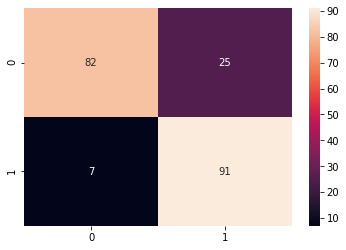

In [123]:
lr_conf_matrix = confusion_matrix(y_test, lr_test_pred)
print(lr_conf_matrix)

sns.heatmap(lr_conf_matrix, annot=True)

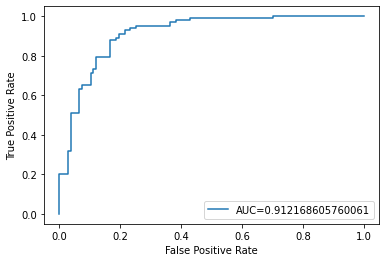

In [124]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Define metrics
fpr, tpr, _ = roc_curve(y_test, test_prob)
auc = roc_auc_score(y_test, test_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

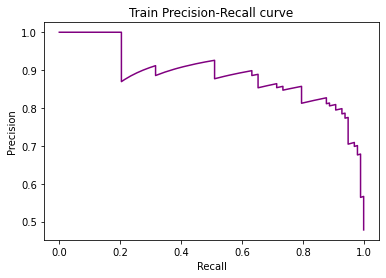

In [125]:
from sklearn.metrics import precision_recall_curve

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, test_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

plt.show()

###### Insights: 
- 'Test' set accuracy is equivalent to 'Train' set accuracy. Hence, not a case of overfitting. 
- Model has a good ROC-AUC

#### C) Interpret the Results

In [126]:
coefficients = np.hstack((lr.intercept_, lr.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,0.018852
1,ca,-0.069172
2,cp_1,-1.252461
3,cp_2,-0.219091
4,cp_3,-0.195074
5,exang,0.000000
6,fbs,0.377224
7,restecg_1,-0.843505
8,restecg_2,-0.641835
9,sex,-0.705460


###### Insights: 
1. For categorical feature sex, this fitted model says that holding all the other features at fixed values, the odds of having heart disease for males (sex=1) to the odds of having heart disease for females is exp(-0.705) = 0.49. 

2. For categorical feature cp (chest pain type), we have created dummy variables for it, the reference value is typical angina (cp = 1). So the odds ratio of atypical angina (cp = 2) to typical angina (cp = 1) is exp(0.050201)= 0.28.

3. Since the numerical variables are scaled by StandardScaler, we need to think of them in terms of standard deviations. 

In [127]:
#Let’s first print out the list of numeric variable and its sample standard deviation.
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,8.461009
1,trestbps,17.543430
2,chol,49.214474
3,thalach,20.781287
4,oldpeak,1.205492


###### Insight: Holding other variables fixed, there is a ~0% increase in the odds of having a heart disease for every standard deviation increase in cholesterol (49.2) since exp(0) = 1.0 

In [ ]:
#!pip install xgboost

In [128]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# For Ensembling
from mlxtend.classifier import StackingCVClassifier

## Task8: Grid Search for Logistic Regression (Hyperparameter Tuning)

In [129]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
max_iter = [100, 150, 200, 250, 300, 350, 400]
param_grid = {"penalty" : penalty,
             "C" : C,
              "max_iter" : max_iter}

In [131]:
log_grid_model = GridSearchCV(lr, param_grid = param_grid, cv=5) 

In [132]:
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          random_state=1, solver='liblinear'),
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'max_iter': [100, 150, 200, 250, 300, 350, 400],
                         'penalty': ['l1', 'l2']})

In [133]:
log_grid_model.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

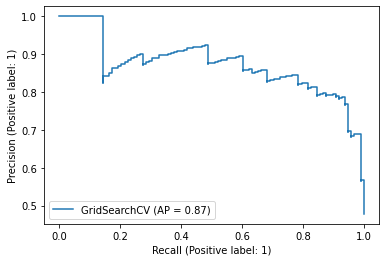

In [135]:
plot_precision_recall_curve(log_grid_model, X_test, y_test);  # Precision - Recall Curve

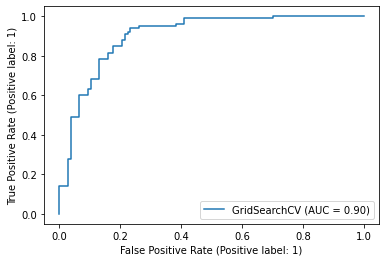

In [136]:
plot_roc_curve(log_grid_model, X_test, y_test);  # Roc curve

In [138]:
y_test_pred_log_grid = log_grid_model.predict(X_test)
y_test_pred_log_grid[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [139]:
test_prob_log_grid = log_grid_model.predict_proba(X_test)[:, 1]
print(test_prob_log_grid[:10])

[0.7843747  0.89642746 0.23564483 0.13770669 0.72707087 0.90508657
 0.28345197 0.08978961 0.56111545 0.61630991]


In [140]:
lr_log_grid_acc_score = accuracy_score(y_test, y_test_pred_log_grid)

print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob_log_grid)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob_log_grid)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob_log_grid)))

print('\nUsing 0.5 as threshold:')

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_test_pred_log_grid)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_test_pred_log_grid)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_test_pred_log_grid)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_test_pred_log_grid)))

print('\nClassification Report')
print(classification_report(y_test, y_test_pred_log_grid))

Log loss = 0.38945
AUC = 0.90292
Average Precision = 0.87163

Using 0.5 as threshold:
Accuracy = 0.83902
Precision = 0.78761
Recall = 0.90816
F1 score = 0.84360

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       107
           1       0.79      0.91      0.84        98

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



[[83 24]
 [ 9 89]]


<Axes: >

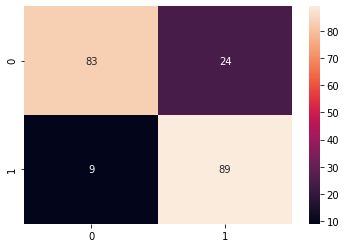

In [141]:
lr_log_grid_conf_matrix = confusion_matrix(y_test, y_test_pred_log_grid)
print(lr_log_grid_conf_matrix)

sns.heatmap(lr_log_grid_conf_matrix, annot=True)

## Task9: Decision Tree

In [142]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [143]:
dt_test_pred = dt.predict(X_test)
dt_test_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [144]:
dt_acc_score = accuracy_score(y_test, dt_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, dt_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, dt_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, dt_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, dt_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, dt_test_pred))

Accuracy = 0.97073
Precision = 0.95098
Recall = 0.98980
F1 score = 0.97000

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.95      0.99      0.97        98

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



[[102   5]
 [  1  97]]


<Axes: >

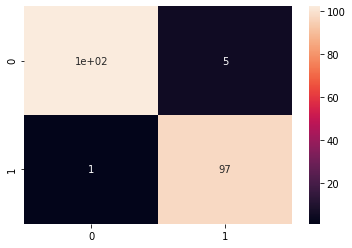

In [145]:
dt_conf_matrix = confusion_matrix(y_test,dt_test_pred)
print(dt_conf_matrix)

sns.heatmap(dt_conf_matrix, annot=True)

## Task10: Random Forest

In [146]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=12)

In [147]:
rf_test_pred = rf.predict(X_test)
rf_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [148]:
rf_acc_score = accuracy_score(y_test, rf_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, rf_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, rf_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, rf_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, rf_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, rf_test_pred))

Accuracy = 0.85366
Precision = 0.80357
Recall = 0.91837
F1 score = 0.85714

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       107
           1       0.80      0.92      0.86        98

    accuracy                           0.85       205
   macro avg       0.86      0.86      0.85       205
weighted avg       0.86      0.85      0.85       205



[[85 22]
 [ 8 90]]


<Axes: >

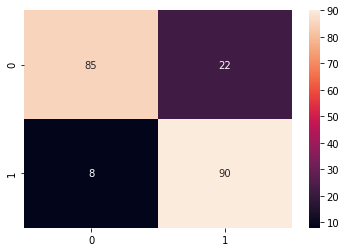

In [150]:
rf_conf_matrix = confusion_matrix(y_test,rf_test_pred)
print(rf_conf_matrix)

sns.heatmap(rf_conf_matrix, annot=True)

## Task11: Grid Search for Random Forest (Hyperparameter Tuning)

In [156]:
param_grid = {'n_estimators':[50, 64, 100, 200],  
              'criterion': [ "gini", "entropy"],  
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[2, 3, 5, 7],
             'min_samples_split':[2, 5, 8]}

In [157]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "f1").fit(X_train, y_train)

In [158]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [159]:
rf_grid_test_pred = rf_grid_model.predict(X_test)
rf_grid_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [160]:
rf_grid_acc_score = accuracy_score(y_test, rf_grid_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, rf_grid_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, rf_grid_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, rf_grid_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, rf_grid_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, rf_grid_test_pred))

Accuracy = 0.96098
Precision = 0.95000
Recall = 0.96939
F1 score = 0.95960

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.95      0.97      0.96        98

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



[[102   5]
 [  3  95]]


<Axes: >

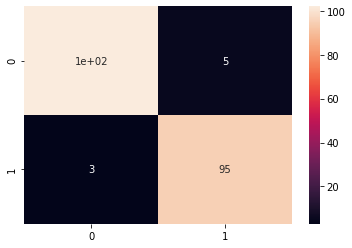

In [161]:
rf_grid_conf_matrix = confusion_matrix(y_test,rf_grid_test_pred)
print(rf_grid_conf_matrix)

sns.heatmap(rf_grid_conf_matrix, annot=True)

## Task12: Support Vector Classifier

In [162]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)

SVC(C=2)

In [163]:
svc_test_pred = svc.predict(X_test)
svc_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [164]:
svc_acc_score = accuracy_score(y_test, svc_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, svc_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, svc_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, svc_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, svc_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, svc_test_pred))

Accuracy = 0.92683
Precision = 0.89524
Recall = 0.95918
F1 score = 0.92611

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       107
           1       0.90      0.96      0.93        98

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



[[96 11]
 [ 4 94]]


<Axes: >

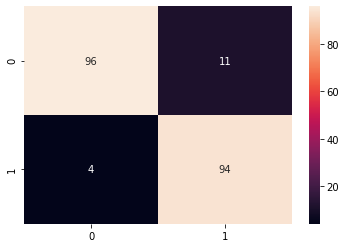

In [165]:
svc_conf_matrix = confusion_matrix(y_test,svc_test_pred)
print(svc_conf_matrix)

sns.heatmap(svc_conf_matrix, annot=True)

## Task13: K-Neighbors Classifier

In [166]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [167]:
knn_test_pred = knn.predict(X_test)
knn_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [168]:
knn_acc_score = accuracy_score(y_test, knn_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, knn_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, knn_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, knn_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, knn_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, knn_test_pred))

Accuracy = 0.84878
Precision = 0.85263
Recall = 0.82653
F1 score = 0.83938

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.85      0.83      0.84        98

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



[[93 14]
 [17 81]]


<Axes: >

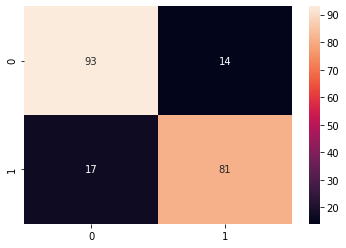

In [169]:
knn_conf_matrix = confusion_matrix(y_test,knn_test_pred)
print(knn_conf_matrix)

sns.heatmap(knn_conf_matrix, annot=True)

## Task14: Naive Bayes Model

In [170]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [171]:
nb_test_pred = nb.predict(X_test)
nb_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [172]:
nb_acc_score = accuracy_score(y_test, nb_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, nb_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, nb_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, nb_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, nb_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, nb_test_pred))

Accuracy = 0.79024
Precision = 0.75229
Recall = 0.83673
F1 score = 0.79227

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       107
           1       0.75      0.84      0.79        98

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



[[80 27]
 [16 82]]


<Axes: >

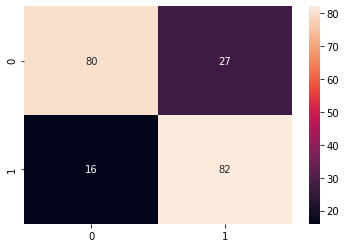

In [173]:
nb_conf_matrix = confusion_matrix(y_test,nb_test_pred)
print(nb_conf_matrix)

sns.heatmap(nb_conf_matrix, annot=True)

## Task15: XGBoost without tuning

In [174]:
xgb_def = XGBClassifier(random_state=10).fit(X_train, y_train)

In [175]:
xgb_def_test_pred = xgb_def.predict(X_test)
xgb_def_test_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [176]:
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, xgb_def_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, xgb_def_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, xgb_def_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, xgb_def_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, xgb_def_test_pred))

Accuracy = 1.00000
Precision = 1.00000
Recall = 1.00000
F1 score = 1.00000

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



[[107   0]
 [  0  98]]


<Axes: >

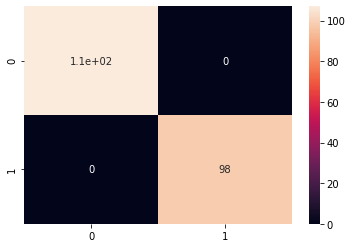

In [177]:
xgb_def_conf_matrix = confusion_matrix(y_test,xgb_def_test_pred)
print(xgb_def_conf_matrix)

sns.heatmap(xgb_def_conf_matrix, annot=True)

In [184]:
X_train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'thal_1', 'thal_2',
       'thal_3', 'restecg_1', 'restecg_2'],
      dtype='object')

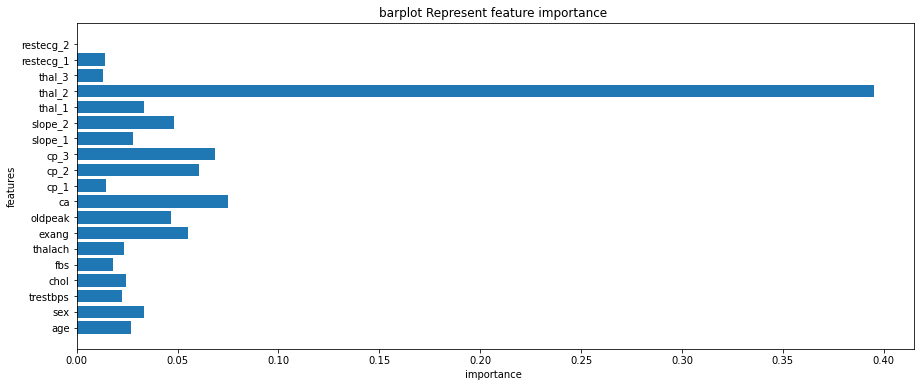

In [186]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'thal_1', 'thal_2',
       'thal_3', 'restecg_1', 'restecg_2'], 'Importance': xgb_def.feature_importances_})
plt.figure(figsize=(15,6))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

###### Insight: This is a perfect model but let's try some tuning.

## Task16: XGBoost with tuning

In [178]:
xgb = XGBClassifier(learning_rate=0.001, n_estimators=20, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [179]:
xgb_test_pred = xgb.predict(X_test)
xgb_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [180]:
xgb_acc_score = accuracy_score(y_test, xgb_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, xgb_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, xgb_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, xgb_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, xgb_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, xgb_test_pred))

Accuracy = 0.85366
Precision = 0.79310
Recall = 0.93878
F1 score = 0.85981

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       107
           1       0.79      0.94      0.86        98

    accuracy                           0.85       205
   macro avg       0.86      0.86      0.85       205
weighted avg       0.87      0.85      0.85       205



[[83 24]
 [ 6 92]]


<Axes: >

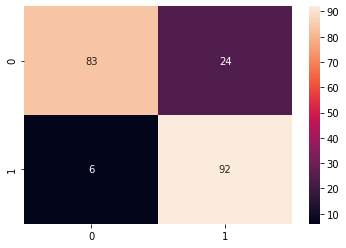

In [183]:
xgb_conf_matrix = confusion_matrix(y_test,xgb_test_pred)
print(xgb_conf_matrix)

sns.heatmap(xgb_conf_matrix, annot=True)

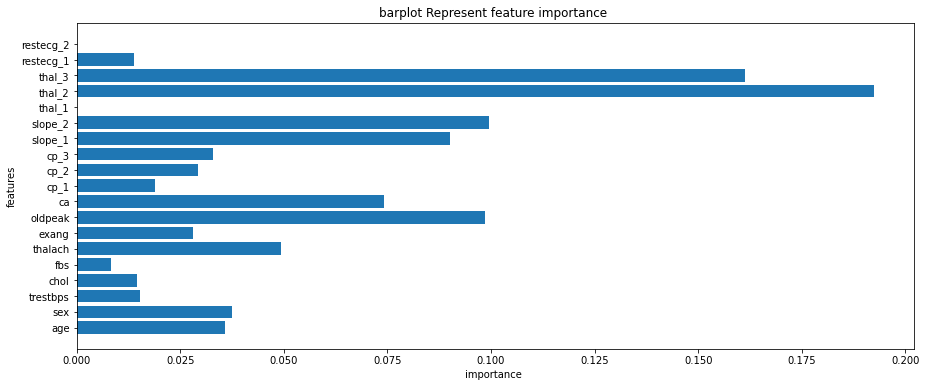

In [188]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'thal_1', 'thal_2',
       'thal_3', 'restecg_1', 'restecg_2'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(15,6))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

## Task17: XGBoost Hyperparameter Tuning

In [192]:
param_grid = {"n_estimators":[50, 100, 200],
              'max_depth':[4,6,8],
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 1, 1.5],
              "colsample_bytree":[0.5, 0.7, 1]}

In [193]:
xgb_model = XGBClassifier(random_state=10)

In [194]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1").fit(X_train, y_train)

In [195]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 1}

In [196]:
xgb_grid_test_pred = xgb_grid.predict(X_test)
xgb_grid_test_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [197]:
xgb_grid_acc_score = accuracy_score(y_test, xgb_grid_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, xgb_grid_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, xgb_grid_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, xgb_grid_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, xgb_grid_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, xgb_grid_test_pred))

Accuracy = 0.98537
Precision = 0.97030
Recall = 1.00000
F1 score = 0.98492

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       107
           1       0.97      1.00      0.98        98

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



[[104   3]
 [  0  98]]


<Axes: >

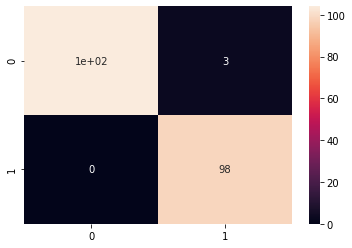

In [198]:
xgb_grid_conf_matrix = confusion_matrix(y_test,xgb_grid_test_pred)
print(xgb_grid_conf_matrix)

sns.heatmap(xgb_grid_conf_matrix, annot=True)

## Task14: Comparing all the models
Except Xgboost default, xgboost grid and rf grid.

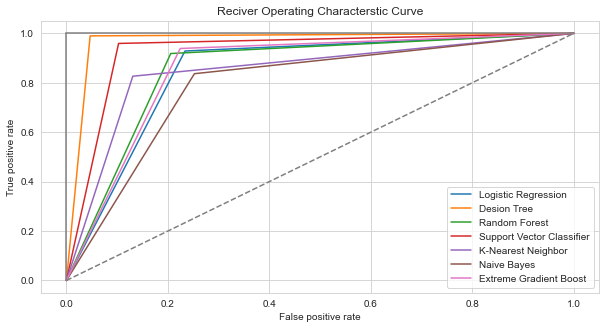

In [199]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_test_pred)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_test_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_test_pred)                                                             
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_test_pred)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_test_pred)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_test_pred)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_test_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [200]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest', 'Support Vector Machine', 'K-Nearest Neighbour', 'Naive Bayes','Extreme Gradient Boost'],
                         'Accuracy': [lr_acc_score*100, dt_acc_score*100, rf_acc_score*100, svc_acc_score*100, knn_acc_score*100, nb_acc_score*100, xgb_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,84.390244
1,Decision Tree,97.073171
2,Random Forest,85.365854
3,Support Vector Machine,92.682927
4,K-Nearest Neighbour,84.878049
5,Naive Bayes,79.024390
6,Extreme Gradient Boost,85.365854


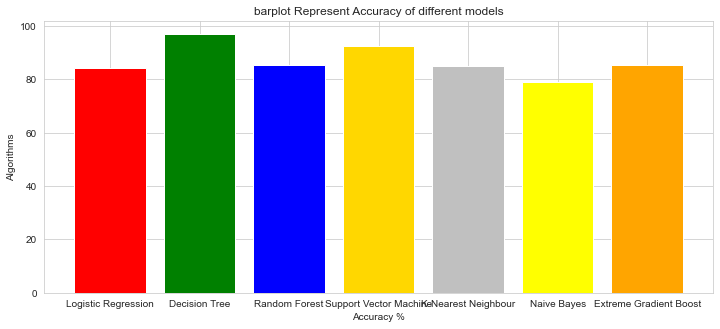

In [201]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color = colors)
plt.show()

## Task15: Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

##### Case1

In [213]:
scv=StackingCVClassifier(classifiers=[dt,xgb,knn], meta_classifier= svc, random_state=42)
scv.fit(X_train,y_train)

StackingCVClassifier(classifiers=[DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         random_state=0),
                                  XGBClassifier(base_score=None, booster='dart',
                                                callbacks=None,
                                                colsample_bylevel=0.6,
                                                colsample_bynode=0.5,
                                                colsample_bytree=0.6,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.6,
                                                gpu_id=None, grow_policy...
                                                learning_rate=0.001,
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=15, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=20, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  KNeighborsClassifier(n_neighbors=10)],
                     meta_classifier=SVC(C=2), random_state=42)

In [214]:
scv_test_pred = scv.predict(X_test)
scv_test_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [215]:
scv_acc_score = accuracy_score(y_test, scv_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, scv_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, scv_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, scv_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, scv_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, scv_test_pred))

Accuracy = 0.90732
Precision = 0.84348
Recall = 0.98980
F1 score = 0.91080

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       107
           1       0.84      0.99      0.91        98

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



[[89 18]
 [ 1 97]]


<Axes: >

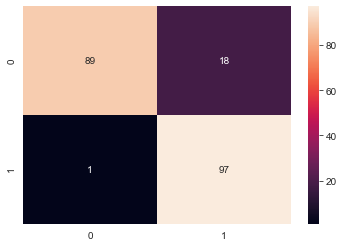

In [216]:
scv_conf_matrix = confusion_matrix(y_test, scv_test_pred)
print(scv_conf_matrix)

sns.heatmap(scv_conf_matrix, annot=True)

##### Case2

In [220]:
dt_scv=StackingCVClassifier(classifiers=[svc,xgb,knn], meta_classifier= dt, random_state=42)
dt_scv.fit(X_train,y_train)

StackingCVClassifier(classifiers=[SVC(C=2),
                                  XGBClassifier(base_score=None, booster='dart',
                                                callbacks=None,
                                                colsample_bylevel=0.6,
                                                colsample_bynode=0.5,
                                                colsample_bytree=0.6,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.6,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learni...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=15, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=20, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  KNeighborsClassifier(n_neighbors=10)],
                     meta_classifier=DecisionTreeClassifier(criterion='entropy',
                                                            max_depth=8,
                                                            random_state=0),
                     random_state=42)

In [221]:
dt_scv_test_pred = dt_scv.predict(X_test)
dt_scv_test_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [222]:
dt_scv_acc_score = accuracy_score(y_test, dt_scv_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, dt_scv_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, dt_scv_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, dt_scv_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, dt_scv_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, dt_scv_test_pred))

Accuracy = 0.92683
Precision = 0.89524
Recall = 0.95918
F1 score = 0.92611

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       107
           1       0.90      0.96      0.93        98

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



[[96 11]
 [ 4 94]]


<Axes: >

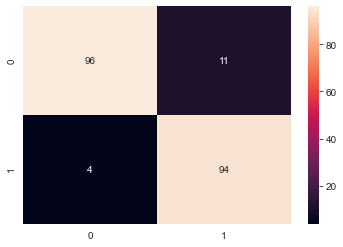

In [223]:
dt_scv_conf_matrix = confusion_matrix(y_test, dt_scv_test_pred)
print(dt_scv_conf_matrix)

sns.heatmap(dt_scv_conf_matrix, annot=True)

In [ ]:
##### Case3

In [224]:
dt2_scv=StackingCVClassifier(classifiers=[dt,svc,xgb], meta_classifier= dt, random_state=42)
dt2_scv.fit(X_train,y_train)

StackingCVClassifier(classifiers=[DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         random_state=0),
                                  SVC(C=2),
                                  XGBClassifier(base_score=None, booster='dart',
                                                callbacks=None,
                                                colsample_bylevel=0.6,
                                                colsample_bynode=0.5,
                                                colsample_bytree=0.6,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.6,
                                                gpu_id=None, gr...
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=15, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=20, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...)],
                     meta_classifier=DecisionTreeClassifier(criterion='entropy',
                                                            max_depth=8,
                                                            random_state=0),
                     random_state=42)

In [225]:
dt2_scv_test_pred = dt2_scv.predict(X_test)
dt2_scv_test_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [226]:
dt2_scv_acc_score = accuracy_score(y_test, dt2_scv_test_pred)

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, dt2_scv_test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, dt2_scv_test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, dt2_scv_test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, dt2_scv_test_pred)))

print('\nClassification Report')
print(classification_report(y_test, dt2_scv_test_pred))

Accuracy = 0.93171
Precision = 0.87500
Recall = 1.00000
F1 score = 0.93333

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       107
           1       0.88      1.00      0.93        98

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.94      0.93      0.93       205



[[93 14]
 [ 0 98]]


<Axes: >

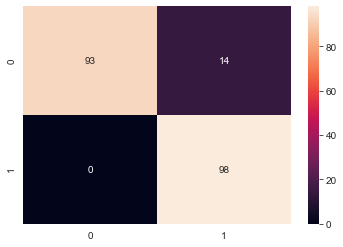

In [227]:
dt2_scv_conf_matrix = confusion_matrix(y_test, dt2_scv_test_pred)
print(dt2_scv_conf_matrix)

sns.heatmap(dt2_scv_conf_matrix, annot=True)